# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from citipy import citipy
# Import citipy to determine the cities based on latitude and longitude


### Generate the Cities List by Using the `citipy` Library

In [2]:
# output file
output_data_file = "output_data/cities.csv"

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind =  city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
       # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")       


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mukah
City not found. Skipping...
Processing Record 2 of Set 1 | princeville
Processing Record 3 of Set 1 | tolanaro
Processing Record 4 of Set 1 | saint-pierre
Processing Record 5 of Set 1 | san antonio de pale
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | porto novo
Processing Record 8 of Set 1 | barah
Processing Record 9 of Set 1 | gokwe
Processing Record 10 of Set 1 | tshabong
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | conception bay south
Processing Record 16 of Set 1 | yei
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | nova sintra
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2

Processing Record 40 of Set 4 | amga
Processing Record 41 of Set 4 | kayes
Processing Record 42 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 43 of Set 4 | st. john's
Processing Record 44 of Set 4 | chestertown
Processing Record 45 of Set 4 | manokwari
Processing Record 46 of Set 4 | punta del este
Processing Record 47 of Set 4 | turtas
Processing Record 48 of Set 4 | san luis de la loma
Processing Record 49 of Set 4 | labytnangi
Processing Record 0 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 1 of Set 5 | east london
Processing Record 2 of Set 5 | vylkove
Processing Record 3 of Set 5 | guapi
Processing Record 4 of Set 5 | bodo
Processing Record 5 of Set 5 | port glaud
City not found. Skipping...
Processing Record 6 of Set 5 | vadso
Processing Record 7 of Set 5 | rio gallegos
Processing Record 8 of Set 5 | nukunonu
City not found. Skipping...
Processing Record 9 of Set 5 | quesnel
Processing Record 10 of Set 5 | flying fish cove
Proces

Processing Record 32 of Set 8 | igarka
Processing Record 33 of Set 8 | ta`u
Processing Record 34 of Set 8 | casper
Processing Record 35 of Set 8 | mugia
Processing Record 36 of Set 8 | kapuskasing
Processing Record 37 of Set 8 | egilsstadir
Processing Record 38 of Set 8 | alofi
Processing Record 39 of Set 8 | roma
Processing Record 40 of Set 8 | wolmaransstad
Processing Record 41 of Set 8 | shitanjing
Processing Record 42 of Set 8 | basco
Processing Record 43 of Set 8 | san pedro pochutla
Processing Record 44 of Set 8 | lavington
Processing Record 45 of Set 8 | jean-rabel
Processing Record 46 of Set 8 | terrace
Processing Record 47 of Set 8 | sur
Processing Record 48 of Set 8 | ugoofaaru
Processing Record 49 of Set 8 | pandan
Processing Record 0 of Set 9 | ust'-barguzin
Processing Record 1 of Set 9 | lodja
Processing Record 2 of Set 9 | vorkuta
Processing Record 3 of Set 9 | nkurenkuru
City not found. Skipping...
Processing Record 4 of Set 9 | yasnyy
Processing Record 5 of Set 9 | lomp

Processing Record 22 of Set 12 | khandwa
Processing Record 23 of Set 12 | novaya balakhna
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
# Convert the cities weather data into a Pandas DataFrame
  # Append the City information into city_data list
#city_data  = {     "City": city, 
                         # "Lat": city_lat, 
                         # "Lng": city_lng, 
                         # "Max Temp": city_max_temp,
                         # "Humidity": city_humidity,
                         # "Cloudiness": city_clouds,
                         # "Wind Speed": city_wind,
                         # "Country": city_country,
                         # "Date": city_date
        #
        

city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,princeville,45.7668,-61.2985,9.23,71,100,3.09,CA,1682443290
1,tolanaro,-25.0319,46.9987,22.04,73,40,3.09,MG,1682443249
2,saint-pierre,-21.3393,55.4781,24.82,88,0,1.03,RE,1682443271
3,san antonio de pale,-1.4014,5.6325,27.84,76,100,2.93,GQ,1682443254
4,port-aux-francais,-49.3500,70.2167,4.18,78,7,10.71,TF,1682443222


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,princeville,45.7668,-61.2985,9.23,71,100,3.09,CA,1682443290
1,tolanaro,-25.0319,46.9987,22.04,73,40,3.09,MG,1682443249
2,saint-pierre,-21.3393,55.4781,24.82,88,0,1.03,RE,1682443271
3,san antonio de pale,-1.4014,5.6325,27.84,76,100,2.93,GQ,1682443254
4,port-aux-francais,-49.3500,70.2167,4.18,78,7,10.71,TF,1682443222


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

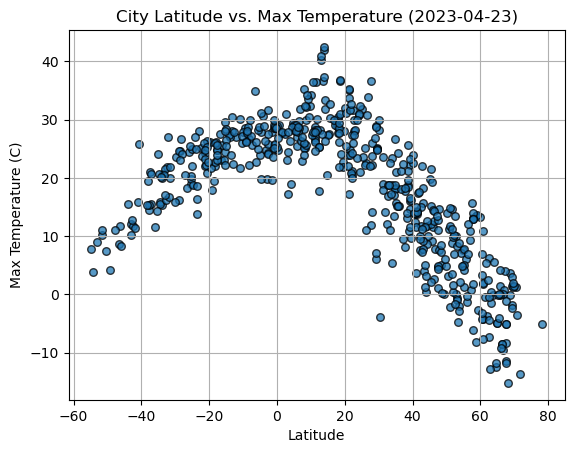

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],marker ='o',
           s=30, edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2023-04-23)')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

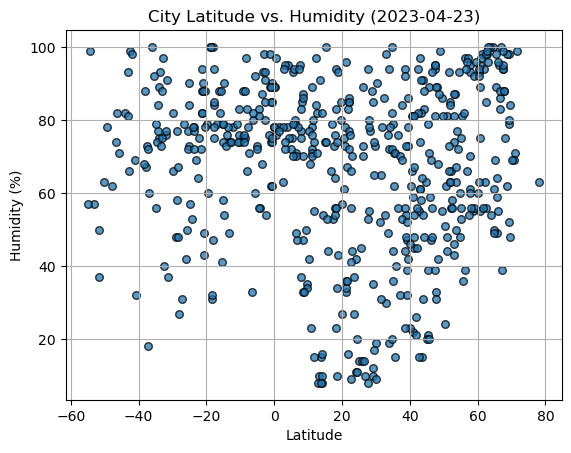

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],marker ='o',
           s=30, edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-04-23)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

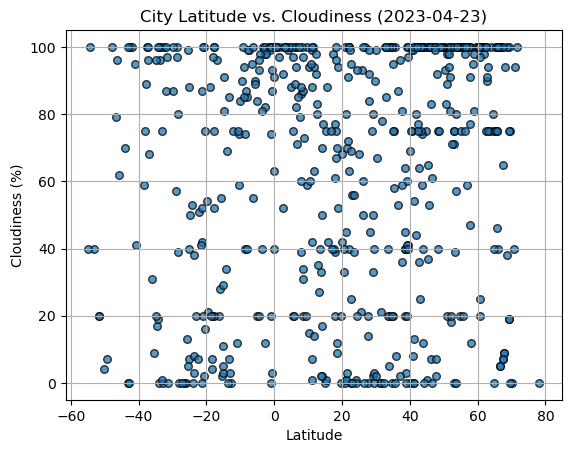

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],marker ='o',
           s=30, edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-04-23)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

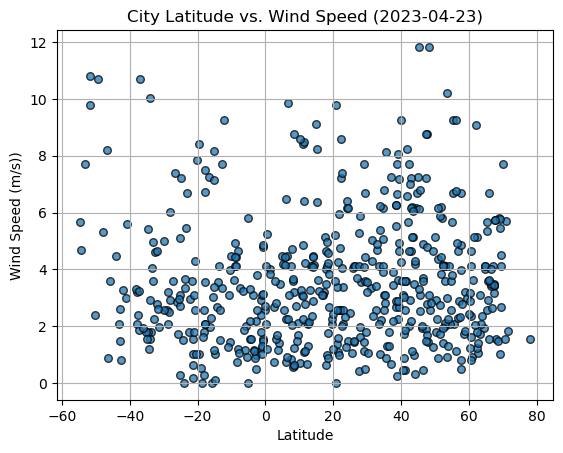

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],marker ='o',
           s=30, edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-04-23)')
plt.ylabel('Wind Speed (m/s))')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df =city_data_df.loc[(city_data_df['Lat'] >= 0 ),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,princeville,45.7668,-61.2985,9.23,71,100,3.09,CA,1682443290
5,porto novo,6.4965,2.6036,29.72,71,100,4.48,BJ,1682443290
6,barah,13.7000,30.3667,36.57,15,33,4.12,SD,1682443290
9,yellowknife,62.4560,-114.3525,6.29,56,75,5.14,CA,1682443231
13,conception bay south,47.4999,-52.9981,4.69,94,100,7.20,CA,1682443291


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0 ),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tolanaro,-25.0319,46.9987,22.04,73,40,3.09,MG,1682443249
2,saint-pierre,-21.3393,55.4781,24.82,88,0,1.03,RE,1682443271
3,san antonio de pale,-1.4014,5.6325,27.84,76,100,2.93,GQ,1682443254
4,port-aux-francais,-49.3500,70.2167,4.18,78,7,10.71,TF,1682443222
7,gokwe,-18.2048,28.9349,21.98,31,4,1.78,ZW,1682443290


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.761


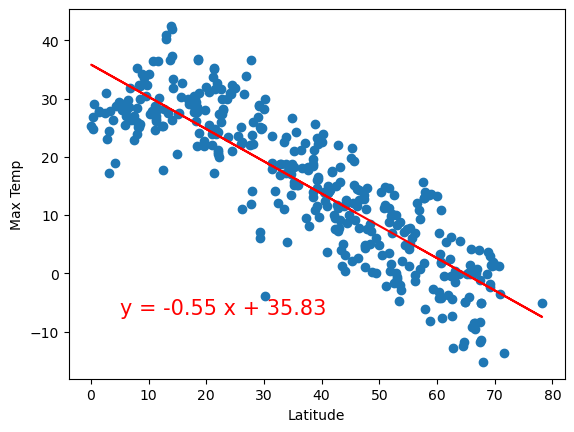

In [15]:
# Linear regression on Northern Hemisphere

(slope, intercept,rvalue, pvalue, stderr)= linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(northern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(line_eq,(5, -7), fontsize=15, color ="r")
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()


The r-squared is: 0.659


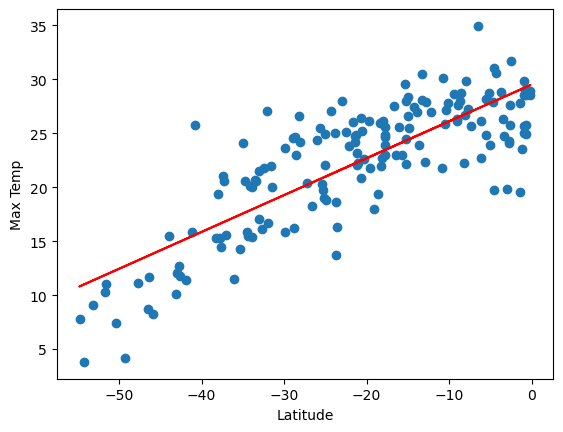

In [16]:
# Linear regression on Southern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(southern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(line_eq,(5, -7), fontsize=15, color ="r")
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()


**Discussion about the linear relationship:** 
In northern Hemisphere , the regression value is 0.825. This means the strong relationship between Latitude and Max Temp. Temperature decreases also Latitude increases from the equator.
In southern Hemisphere , the regression value is 0.393. This means the week relationship between Latitude and Max Temp. Remperature increases , Latitude decreases. Latitude decreases away from the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.029


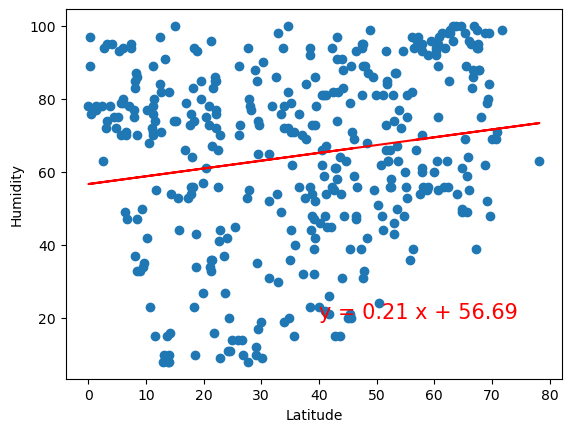

In [17]:
# Northern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(northern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(line_eq,(40, 20), fontsize=15, color ="r")
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()


The r-squared is: 0.029


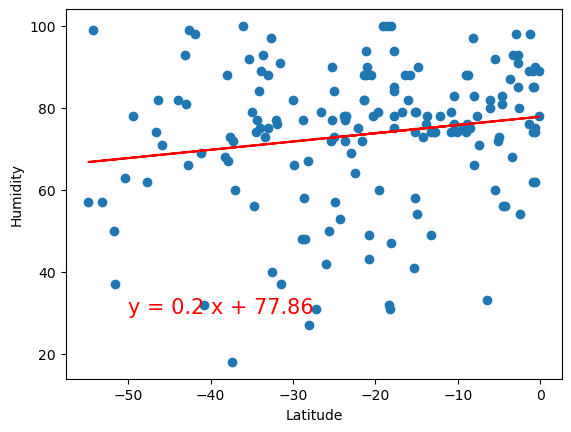

In [18]:
# Southern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(southern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(line_eq,(-50, 30), fontsize=15, color ="r")
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()

**Discussion about the linear relationship:**
In northern Hemisphere , the regression value is 0.014. This means very weak relationship between Latitude and Humidity. Humidity increases also Latitude increases from the equator. partially cities humid with highest %. partially less.
In southern Hemisphere , the regression value is 0.089. This means very week relationship between Latitude and Humidity. almost 70% cities affected with humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.005


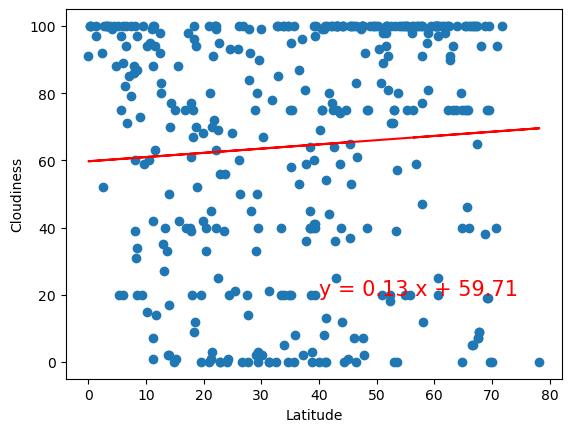

In [19]:
# Northern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(northern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(line_eq,(40, 20), fontsize=15, color ="r")
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()

The r-squared is: 0.016


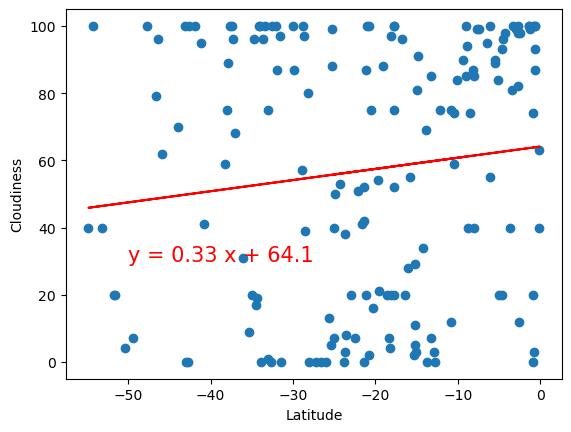

In [20]:
# Southern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(southern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(line_eq,(-50, 30), fontsize=15, color ="r")
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()

**Discussion about the linear relationship:**
In northern Hemisphere , the regression value is 0.0. This means very weak relationship between Latitude and Cloudiness. Cloudiness increases also Latitude increases from the equator. partially cities affected less cloudiness, the other cities are more cloudy.
In southern Hemisphere , the regression value is 0.017. This means very week relationship between Latitude and Cloudiness. Most cities affected cloudiness near the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.003


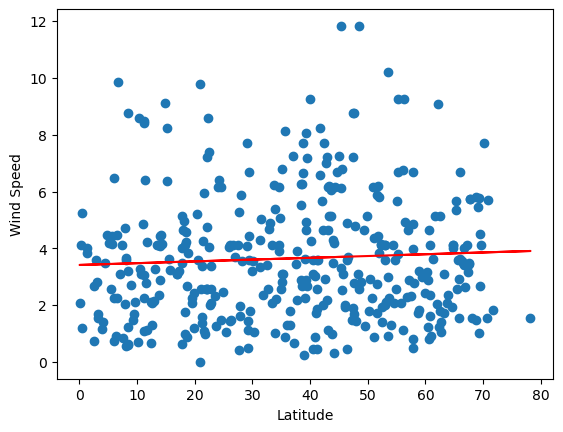

In [21]:
# Northern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(northern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(line_eq,(40, 20), fontsize=15, color ="r")
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()

The r-squared is: 0.087


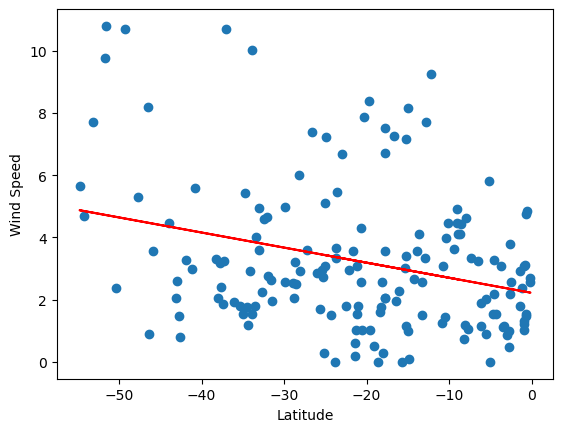

In [22]:
# Southern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(southern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(line_eq,(-50, 30), fontsize=15, color ="r")
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()

**Discussion about the linear relationship:** 
In northern Hemisphere , the regression value is 0.03. This means very weak relationship between Latitude and Wind Speed. Wind Speed increases also Latitude increases from the equator. windspeed effected more cities in northern hemisphere.
In southern Hemisphere , the regression value is 0.06. This means very week relationship between Latitude and Wind Speed. Remperature decreases , Latitude decreases too. Latitude decreases away from the equator. wind speed is not that much effected in southern hemisphere cities compared to northern.